# 対流熱伝達(ニュートンの冷却則)

$q_c = \alpha_c \cdot (\theta_s - \theta_f)$

* $q_c$ ... 対流による伝熱量 [$W/m^2$]
* $\alpha_c$ ... 熱伝達率 [$W/m^2\cdot K$]
* $\theta_s$ ... 個体壁表面温 [${}^\circ\mathrm{C}$]
* $\theta_f$ ... 壁体から十分離れた流体(空気)の温度 [${}^\circ\mathrm{C}$]

(最新建築環境工学 P.35, P.185)

In [1]:
#matplotlib inline

import matplotlib.pyplot as plt
import math
import nbimporter
import Functions as F
import Modules as M

Importing Jupyter notebook from Functions.ipynb
Importing Jupyter notebook from Modules.ipynb


## 室温を固定にした場合

室温27度固定とし、壁体初期温度20度のからはじめて室温／垂直壁／天井／床の温度変化を計算してみる。

自然換気効果が低い床部分の温度が一番上昇しずらいことがわかります。

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


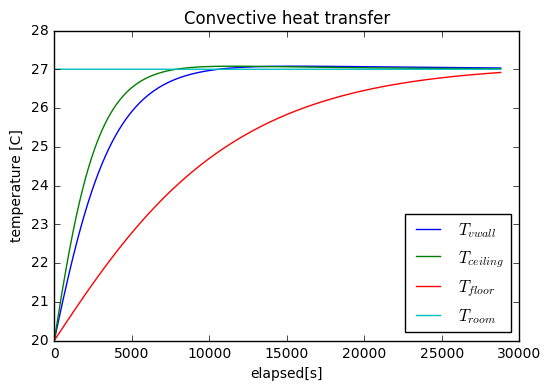

In [2]:
#計算単位時間 dt[s]
dt = 1

#厚み1cm、表面積1m2 せっこうボード 20[K]
vertical_wall = M.HeatCapacityModule(1 * 0.01, 854, 20)
ceiling = M.HeatCapacityModule(1 * 0.01, 854, 20)
floor = M.HeatCapacityModule(1 * 0.01, 854, 20)

#空気で満たされた部屋 1m3 0[K]
roomT = F.Function(lambda t: 27)

#自然換気対流 接する面積 1m2
vertical_wall.HeatIn.append( F.NewtonCooling(vertical_wall.T, roomT, 1, 1.98, dt) )
ceiling.HeatIn.append( F.NewtonCooling(ceiling.T, roomT, 1, 2.67, dt) )
floor.HeatIn.append( F.NewtonCooling(floor.T, roomT, 1, 0.64, dt) )

container = M.ContainerModule()
container.Modules.extend([vertical_wall, ceiling, floor])

data = []
for i in range(60*480):
    container.commit(i)
    data.append((i*dt, vertical_wall.T(i), ceiling.T(i), floor.T(i), roomT(i)))

#表示
x = [x[0] for x in data]
plt.title("Convective heat transfer")
plt.plot(x, [y[1] for y in data], label="$T_{vwall}$")
plt.plot(x, [y[2] for y in data], label="$T_{ceiling}$")
plt.plot(x, [y[3] for y in data], label="$T_{floor}$")
plt.plot(x, [y[4] for y in data], label="$T_{room}$")
#plt.ylim(0,50)
plt.xlabel("elapsed[s]")
plt.ylabel("temperature [C]")
plt.legend(loc="lower right")

plt.show()

## 床下温度を固定した場合

条件を少し変更し、室と床下を入れ替えます。

室温は速やかに温まる一方で、壁と天井がゆっくりになります。


C:\Program Files\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


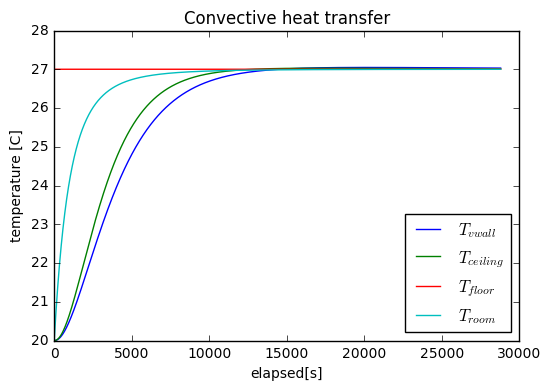

In [4]:
#計算単位時間 dt[s]
dt = 1

#厚み1cm、表面積1m2 せっこうボード 20[K]
vertical_wall = M.HeatCapacityModule(1 * 0.01, 854, 20)
ceiling = M.HeatCapacityModule(1 * 0.01, 854, 20)
floorT = F.Function(lambda t: 27)

#空気で満たされた部屋 1m3 0[K]
room = M.HeatCapacityModule(1, 1.024 * 1.007, 20)

#自然換気対流 接する面積 1m2
vertical_wall.HeatIn.append( F.NewtonCooling(vertical_wall.T, room.T, 1, 1.98, dt) )
ceiling.HeatIn.append( F.NewtonCooling(ceiling.T, room.T, 1, 2.67, dt) )
room.HeatIn.append( F.Invert(F.NewtonCooling(floorT, room.T, 1, 0.64, dt)) )

container = M.ContainerModule()
container.Modules.extend([vertical_wall, ceiling, room])

data = []
for i in range(60*480):
    container.commit(i)
    data.append((i*dt, vertical_wall.T(i), ceiling.T(i), floorT(i), room.T(i)))

#表示
x = [x[0] for x in data]
plt.title("Convective heat transfer")
plt.plot(x, [y[1] for y in data], label="$T_{vwall}$")
plt.plot(x, [y[2] for y in data], label="$T_{ceiling}$")
plt.plot(x, [y[3] for y in data], label="$T_{floor}$")
plt.plot(x, [y[4] for y in data], label="$T_{room}$")
#plt.ylim(0,50)
plt.xlabel("elapsed[s]")
plt.ylabel("temperature [C]")
plt.legend(loc="lower right")

plt.show()